## Objective: Put qubit in superposition and measure it.

##### important note:

|0⟩ =
[
1
0
]

|1⟩ =
[
0
1
]

#### imports

In [1]:
from qiskit import QuantumCircuit, assemble, Aer, execute, IBMQ, __qiskit_version__
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.tools import job_monitor
from qiskit_textbook.tools import array_to_latex
from math import sqrt, pi

print(__qiskit_version__)    # TODO: finish running the circuit on a quantum computer.

{'qiskit-terra': '0.16.4', 'qiskit-aer': '0.7.6', 'qiskit-ignis': '0.5.2', 'qiskit-ibmq-provider': '0.12.1', 'qiskit-aqua': '0.8.2', 'qiskit': '0.24.0'}


#### create qubit

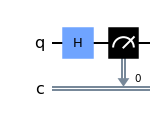

In [2]:
# Create qubit.
qubit = QuantumCircuit(1, 1)
qubit.h(0)    # Put first qubit in superposition
qubit.measure(0, 0)

# Create object.
qobj = assemble(qubit)

# Show the steps of the circuit.
qubit.draw(output='mpl')

#### check measurement probabilities through sim

In [3]:
# NOTE: We need to create a new qubit without measurement (to visualize probabilities).
qubit_2 = QuantumCircuit(1)
qubit_2.h(0)
qobj_2 = assemble(qubit_2)

sv_sim = Aer.get_backend('statevector_simulator')
state = sv_sim.run(qobj_2).result().get_statevector()

# Show result of sim.
array_to_latex(state, pretext="\\text{Probabilitiy Vector = }")

# NOTE: We find that there is a 50/50 chance of measuring |0> and |1>.

<IPython.core.display.Math object>

#### simulate the qubit measurements

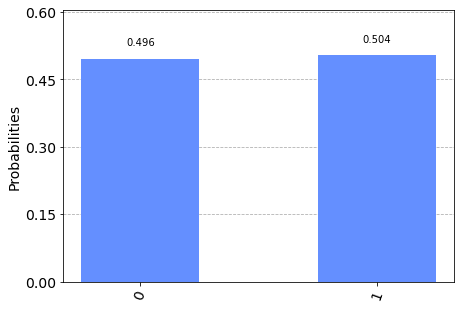

In [4]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qubit, simulator, shots=1000)    # Simulate qubit measurement 1000 times.
result = job.result()

# Show results of the simulation.
counts = result.get_counts(qubit)
plot_histogram(counts)

#### simulate the qubit measurements (on a bloch sphere)

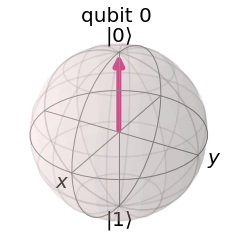

In [5]:
# Run simulation.
state = sv_sim.run(qobj).result().get_statevector()

# NOTE: The reason why a new simulator is used is bc this simulator
#       returns the statevector (final measurement) of the qubit
#       through get_statevector() while 'qasm_simulator' returns
#       get_counts(), getting measurements for a specific amounts of shots.
# Plot the state of the qubit (statevector).

plot_bloch_multivector(state)

#### run simulation on an actual IBM quantum computer.

ibmqfactory.load_account:WARNING:2021-04-10 14:54:00,962: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


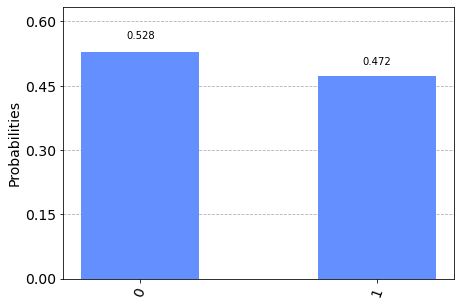

In [12]:
# NOTE: If you don't have an IBMQ account follow this video to get started: https://bit.ly/3s6tayr

IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q')

qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(qubit, backend=qcomp)
job_monitor(job)

result = job.result()
plot_histogram(result.get_counts())

# NOTE: The simulated version has more accurate results
#       bc the real quantum computer has quantum noise and can result in breaking of superposition.
